In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LassoCV

In [42]:
K_FOLD_NUM = 5
RAND_SEED = 1

In [9]:
df_train = pd.read_csv("../input/train.csv")
df_test    = pd.read_csv("../input/test.csv")

In [10]:
num_cols = df_train.select_dtypes(exclude = ["object"]).columns
num_cols = num_cols.drop(['Id', 'SalePrice'])
cat_cols = df_train.select_dtypes(include = ["object"]).columns
# num_cols = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
# num_cols.remove('SalePrice')
# num_cols.remove('Id')
# cat_cols = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

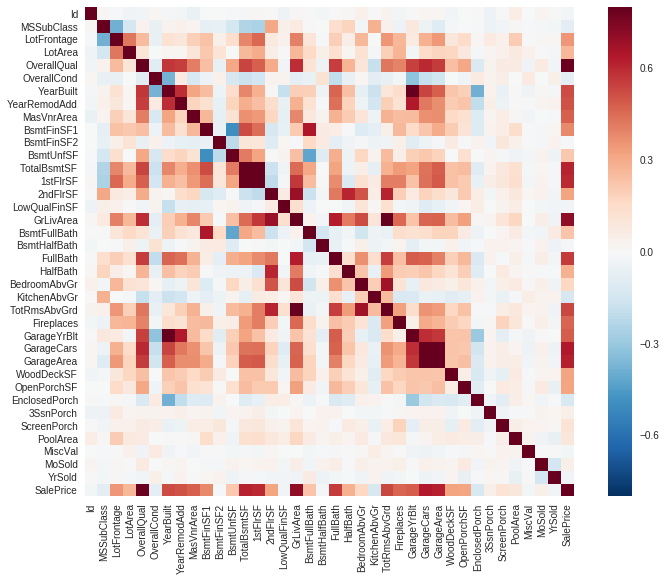

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [82]:
train_raw = pd.read_csv("../input/train.csv")
corrmat2 = train_raw.corr('spearman')

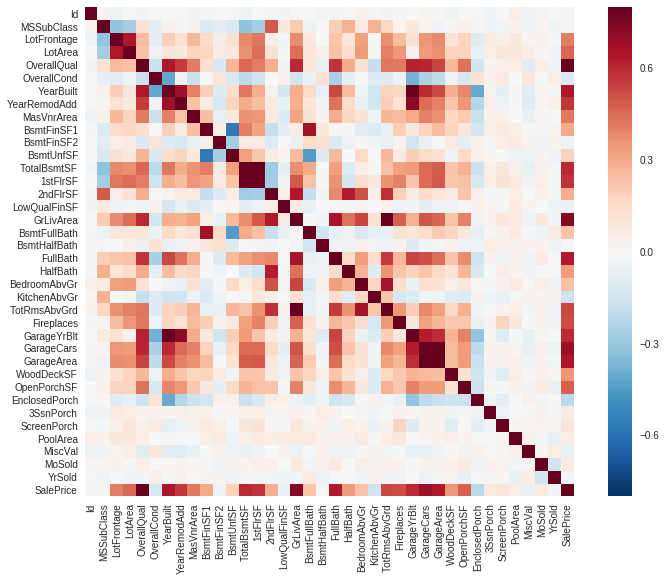

In [83]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=.8, square=True);

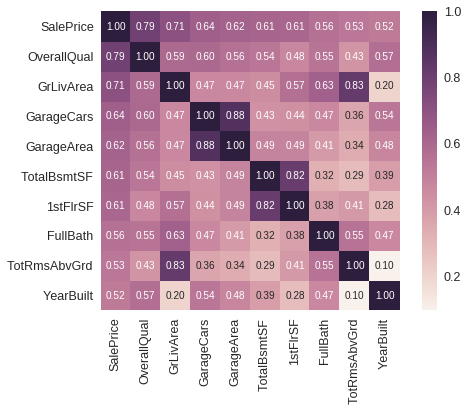

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

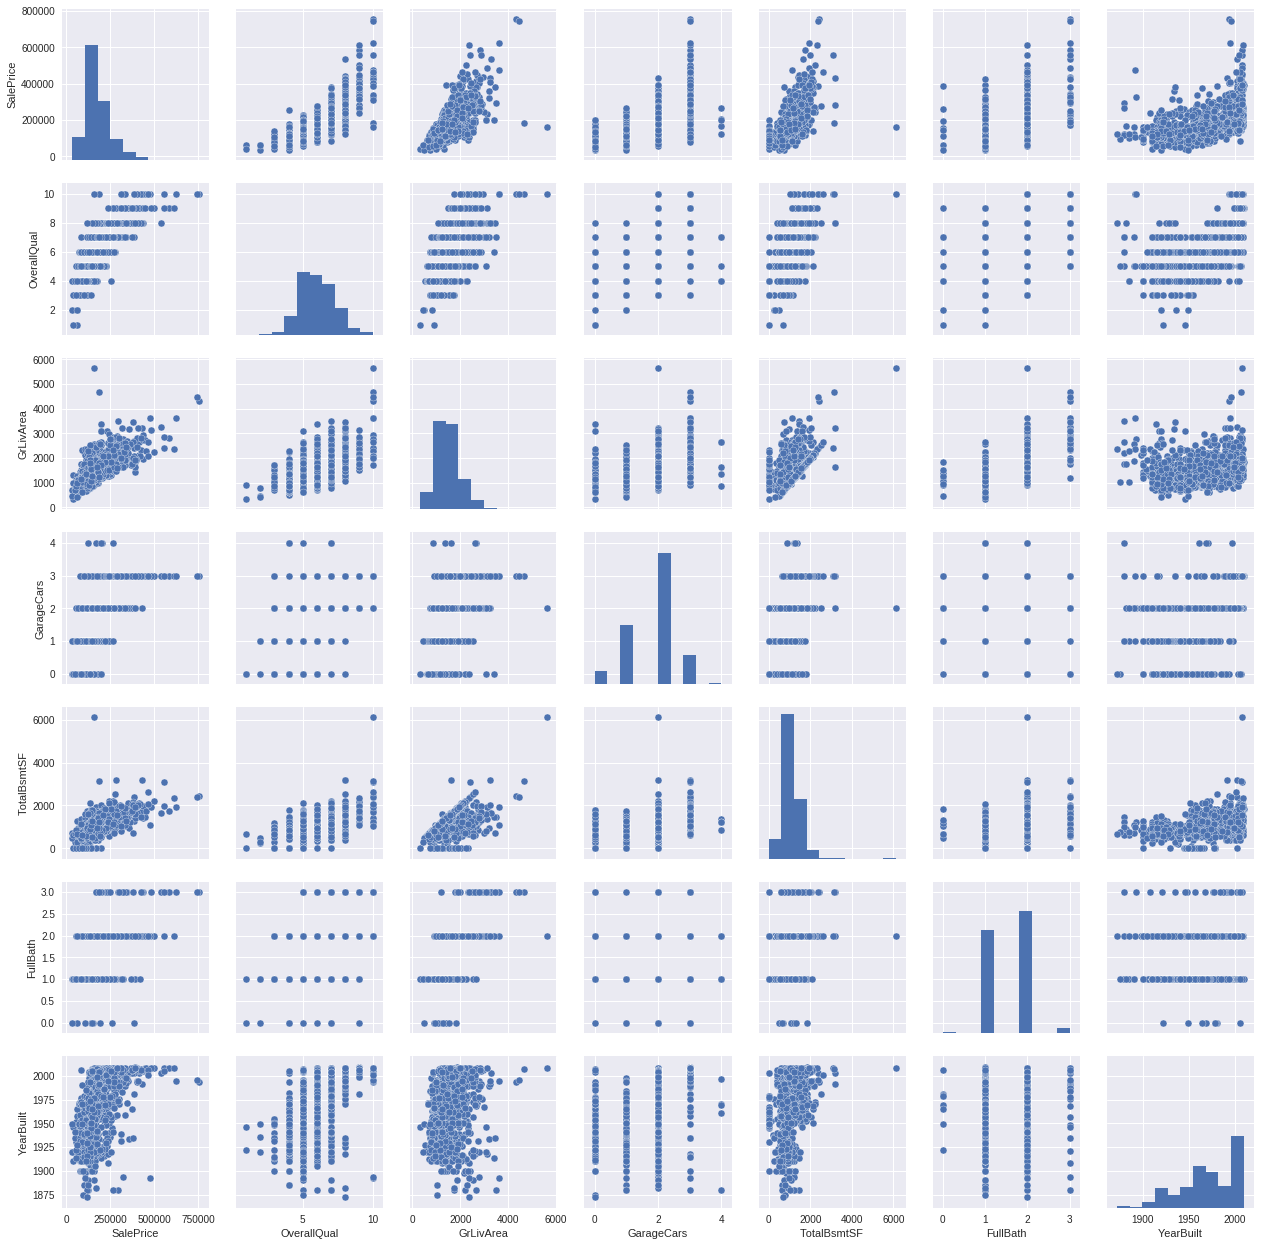

In [13]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Missing Data

In [18]:
null_col = df_train.columns[df_train.isnull().any()]
total_miss = df_train[null_col].isnull().sum()
count = df_train.index.size
percent = total_miss / count
missing_data = DataFrame({'Total': total_miss, 'Percent': percent})
missing_data = missing_data.sort_values(['Percent'])
missing_data

,Percent,Total
Electrical,0.000685,1
MasVnrType,0.005479,8
MasVnrArea,0.005479,8
BsmtQual,0.025342,37
BsmtCond,0.025342,37
BsmtFinType1,0.025342,37
BsmtExposure,0.026027,38
BsmtFinType2,0.026027,38
GarageCond,0.055479,81
GarageQual,0.055479,81


In [15]:
class CatImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.fill_value_ = X.value_counts().idxmax()
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.fill_value_)

    
def fillMissCatData(feature):
    imputer = CatImputer()
    df_train[feature+'_Fill'] = imputer.fit_transform(df_train[feature])
    return imputer

def fillMissNumData(feature):
    imputer = Imputer(strategy='median')
    df_train[feature+'_Fill'] = imputer.fit_transform(df_train[[feature]])
    return imputer

def getMutiNumImputer(features):
    imputer = Imputer(strategy='median')
    imputer.fit(df_train[features])
    return imputer

def getCatImputer(feature):
    imputer = CatImputer()
    imputer.fit(df_train[feature])
    return imputer

In [11]:
df_train[missing_data[missing_data['Percent'] < 0.2].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
Electrical      1459 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtFinType1    1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType2    1422 non-null object
GarageCond      1379 non-null object
GarageQual      1379 non-null object
GarageFinish    1379 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
LotFrontage     1201 non-null float64
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [12]:
# fill category data
impute_Electrical = fillMissCatData('Electrical')
impute_MasVnrType = fillMissCatData('MasVnrType')
impute_BsmtQual = fillMissCatData('BsmtQual')
impute_BsmtCond = fillMissCatData('BsmtCond')
impute_BsmtFinType1 = fillMissCatData('BsmtFinType1')
impute_BsmtExposure = fillMissCatData('BsmtExposure')
impute_BsmtFinType2 = fillMissCatData('BsmtFinType2')
impute_GarageCond = fillMissCatData('GarageCond')
impute_GarageQual = fillMissCatData('GarageQual')
impute_GarageFinish = fillMissCatData('GarageFinish')
impute_GarageType = fillMissCatData('GarageType')

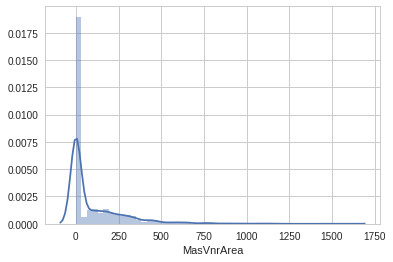

In [77]:
sns.distplot(df_train['MasVnrArea'].dropna())

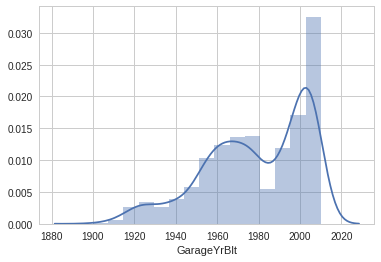

In [78]:
sns.distplot(df_train['GarageYrBlt'].dropna())

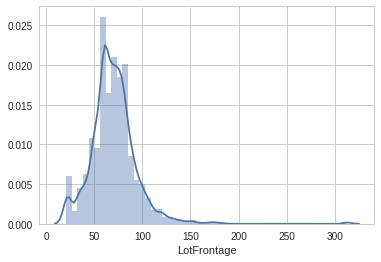

In [79]:
sns.distplot(df_train['LotFrontage'].dropna())

In [16]:
# u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', 
# u'BsmtFullBath', u'BsmtHalfBath', u'GarageCars', u'GarageArea',
# u'MasVnrArea', u'LotFrontage'


# fill numeral data
impute_MasVnrArea = fillMissNumData('MasVnrArea')
# impute_GarageYrBlt = fillMissNumData('GarageYrBlt')
impute_LotFrontage = fillMissNumData('LotFrontage')

In [92]:
missing_data.index

Index([u'Electrical', u'MasVnrType', u'MasVnrArea', u'BsmtQual', u'BsmtCond',
       u'BsmtFinType1', u'BsmtExposure', u'BsmtFinType2', u'GarageCond',
       u'GarageQual', u'GarageFinish', u'GarageType', u'GarageYrBlt',
       u'LotFrontage', u'FireplaceQu', u'Fence', u'Alley', u'MiscFeature',
       u'PoolQC'],
      dtype='object')

In [26]:
def getFeedColumns():
    feed_cols = []
    exclude = set(['Id', 'SalePrice'])
    for col in df_train.columns:
        if col not in missing_data.index and col not in exclude:
            feed_cols.append(col)
    return feed_cols

def getRawColumnNames(cols_name):
    raw_cols_name = [name.split('_', 1)[0] for name in cols_name]
    return raw_cols_name
    
def convertToRawColumnName(df):
    new_df = DataFrame()
    raw_cols_name = getRawColumnNames(df.columns)
    new_df[raw_cols_name] = df
    return new_df

In [29]:
convertToRawColumnName(df_train[feed_num_cols]).columns

Index([u'MSSubClass', u'LotArea', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF',
       u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'MasVnrArea', u'LotFrontage'],
      dtype='object')

In [37]:
feed_cols = getFeedColumns()
feed_num_cols = [col for col in feed_cols if df_train.dtypes[col] != 'object']
feed_cat_cols = [col for col in feed_cols if df_train.dtypes[col] == 'object']
raw_feed_num_cols = getRawColumnNames(feed_num_cols)
raw_feed_cat_cols = getRawColumnNames(feed_cat_cols)

In [31]:
feed_cat_dummies = pd.get_dummies(df_train[feed_cat_cols], prefix=raw_feed_cat_cols)

In [32]:
X_train = convertToRawColumnName(df_train[feed_num_cols]).join(feed_cat_dummies)

In [35]:
Y_train = np.log1p(df_train['SalePrice'])

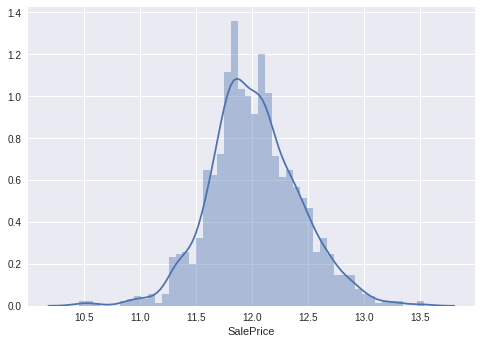

In [61]:
sns.distplot(Y_train, bins=50)

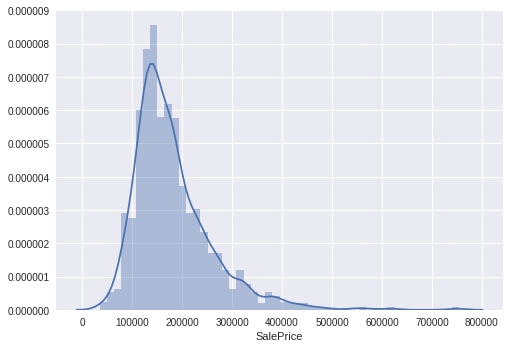

In [62]:
sns.distplot(df_train['SalePrice'], bins=50)

# Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rfg = RandomForestRegressor(n_estimators=100, random_state=RAND_SEED, oob_score=True)
rfg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [21]:
rfg.oob_score_

0.85903548000136964

In [22]:
rfg.score(X_train, Y_train)

0.98130412493930363

In [25]:
#  DataFrame({}) rfg.feature_importances_
def getFeatureImportances(names, importances):
    df = DataFrame({'Features': names, 'Importances': importances})
    return df.sort_values('Importances', ascending=False)

In [39]:
df_feature = getFeatureImportances(X_train.columns.values, rfg.feature_importances_)

In [91]:
select_cols = df_feature.iloc[:5]['Features']
X_train_select = X_train[select_cols]
# df_train[df_feature.iloc[:10]['Features']]

In [96]:
select_cols

2     OverallQual
13      GrLivArea
9     TotalBsmtSF
11       2ndFlrSF
6      BsmtFinSF1
Name: Features, dtype: object

In [51]:
rfg = RandomForestRegressor(n_estimators=100, random_state=RAND_SEED, oob_score=True)
rfg.fit(X_train_select, Y_train)
print rfg.oob_score_, rfg.score(X_train_select, Y_train)

0.851168845958 0.979487254751


In [50]:
rfg = RandomForestRegressor(n_estimators=100, random_state=RAND_SEED)
scores = cross_val_score(rfg, X_train_select, Y_train, cv=K_FOLD_NUM, n_jobs=-1)
print scores.mean(), scores.std()

0.844903793929 0.0170627814627


In [106]:
estimator = RandomForestRegressor(random_state=RAND_SEED)
param_grid = dict(n_estimators=[1000], max_features=[3, 4], max_depth=[3, 6, 9])
gs_cv = GridSearchCV(estimator, param_grid, cv=K_FOLD_NUM, n_jobs=-1)

In [107]:
gs_cv.fit(X_train_select, Y_train)
print  gs_cv.best_score_, gs_cv.best_params_

0.823266873688 {'max_features': 3, 'n_estimators': 1000, 'max_depth': 9}


In [108]:
gs_cv.cv_results_['mean_test_score']

array([ 0.76308763,  0.752839  ,  0.81999701,  0.81713679,  0.82326687,
        0.82062427])

In [109]:
gs_cv.cv_results_['mean_train_score']

array([ 0.78636829,  0.78010851,  0.88743819,  0.88958891,  0.94413718,
        0.94624797])

In [110]:
gs_cv.cv_results_['params']

({'max_depth': 3, 'max_features': 3, 'n_estimators': 1000},
 {'max_depth': 3, 'max_features': 4, 'n_estimators': 1000},
 {'max_depth': 6, 'max_features': 3, 'n_estimators': 1000},
 {'max_depth': 6, 'max_features': 4, 'n_estimators': 1000},
 {'max_depth': 9, 'max_features': 3, 'n_estimators': 1000},
 {'max_depth': 9, 'max_features': 4, 'n_estimators': 1000})

In [76]:
params = gs_cv.cv_results_['params']
rank = gs_cv.cv_results_['rank_test_score']

In [82]:
rank = list(gs_cv.cv_results_['rank_test_score'])
params[rank.index(1)]

{'max_depth': 30, 'max_features': 3, 'n_estimators': 200}

In [86]:
gs_cv.cv_results_['rank_test_score']

array([15, 17, 16, 12,  3,  5, 13, 11, 14,  7,  4,  6, 10,  2,  1, 18,  8,
        9], dtype=int32)

In [89]:
gs_cv.best_estimator_.score(X_train_select, Y_train)

0.97878241819712219

In [50]:
from scipy.stats import skew
is_skewed  = X_train[raw_feed_num_cols].apply(lambda x: skew(x) > 0.75)
X_train_scale = X_train[raw_feed_num_cols].copy()
X_train_scale.loc[:, is_skewed] = np.log1p(X_train_scale.ix[:, is_skewed])

In [110]:
# type(is_skewed)
skew_cols = Series(raw_feed_num_cols)[is_skewed.values]
# a = Series([1, 2, 3])
# a[a > 2]
# print (a > 2).shape

In [111]:
# print type(is_skewed)
skew_cols

0        MSSubClass
1           LotArea
6        BsmtFinSF1
7        BsmtFinSF2
8         BsmtUnfSF
9       TotalBsmtSF
10         1stFlrSF
11         2ndFlrSF
12     LowQualFinSF
13        GrLivArea
15     BsmtHalfBath
19     KitchenAbvGr
24       WoodDeckSF
25      OpenPorchSF
26    EnclosedPorch
27        3SsnPorch
28      ScreenPorch
29         PoolArea
30          MiscVal
33       MasVnrArea
34      LotFrontage
dtype: object

In [51]:
X_train_scale.ix[:, is_skewed].describe()

,MSSubClass,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MasVnrArea,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.818794,9.110966,4.229731,0.655398,5.648378,6.750560,7.008452,2.864586,0.099814,7.268512,...,0.711673,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456,2.120264,4.214451
std,0.688354,0.517369,2.992052,1.845045,1.854020,1.145712,0.317431,3.293311,0.747354,0.333303,...,0.089268,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030,2.628759,0.314395
min,3.044522,7.170888,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.091042
25%,3.044522,8.929898,0.000000,0.000000,5.411646,6.680541,6.783325,0.000000,0.000000,7.030415,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.110874
50%,3.931826,9.156887,5.951943,0.000000,6.170651,6.900227,6.992096,0.000000,0.000000,7.289611,...,0.693147,0.000000,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.248495
75%,4.262680,9.358976,6.569832,0.000000,6.695799,7.169542,7.238676,6.591674,0.000000,7.483104,...,0.693147,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,5.107456,4.382027
max,5.252273,12.279537,8.638525,7.296413,7.756623,8.717846,8.453827,7.633370,6.350886,8.638171,...,1.386294,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660,7.378384,5.749393


In [52]:
X_train_scale = X_train_scale.join(feed_cat_dummies)

In [53]:
lasso_cv = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], cv=K_FOLD_NUM, random_state=RAND_SEED, n_jobs=-1)

In [54]:
lasso_cv.fit(X_train_scale, Y_train)

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
    normalize=False, positive=False, precompute='auto', random_state=1,
    selection='cyclic', tol=0.0001, verbose=False)

In [55]:
lasso_cv.score(X_train_scale, Y_train)

0.92803752780397553

In [88]:
def rmse_cv(model, X_train, Y_train):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [57]:
rmse_cv(lasso_cv, X_train_scale, Y_train).mean()

0.12299741555896226

In [58]:
scores = cross_val_score(lasso_cv, X_train_scale, Y_train, scoring="r2", cv = 5)
print scores.mean(), scores.std()

0.903357247764 0.0256358066636


# Test Data

In [60]:
null_num_col_test = df_test[raw_feed_num_cols].columns[df_test[raw_feed_num_cols].isnull().any()]
null_cat_col_test = df_test[raw_feed_cat_cols].columns[df_test[raw_feed_cat_cols].isnull().any()]

In [61]:
imputer_null_num_col_test = getMutiNumImputer(null_num_col_test)

In [62]:
X_test_scale = df_test[raw_feed_num_cols].copy()

In [63]:
X_test_scale.loc[:, null_num_col_test] = \
    imputer_null_num_col_test.transform(X_test_scale[null_num_col_test])

In [74]:
def fillMissCatDataTest(df, feature):
    imputer = CatImputer()
    imputer.fit(df_train[feature])
    df.loc[:, feature] = imputer.transform(df[[feature]])
    return imputer

In [75]:
df_temp = df_test[raw_feed_cat_cols]
for col in null_cat_col_test:
    fillMissCatDataTest(df_temp, col)

/home/damonhao/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [76]:
feed_cat_dummies_test = pd.get_dummies(df_temp, prefix=raw_feed_cat_cols)

In [79]:
set(feed_cat_dummies.columns) == set(feed_cat_dummies_test.columns)
print len(feed_cat_dummies.columns), len(feed_cat_dummies_test.columns)

182 168


In [85]:
extra_cat_cols = set(feed_cat_dummies.columns) - set(feed_cat_dummies_test.columns)
X_train_drop_extra_cols = X_train_scale.drop(extra_cat_cols, axis=1)

In [86]:
set(X_train_drop_extra_cols.columns) == set(X_test_scale.join(feed_cat_dummies_test).columns)

True

In [91]:
X_test_scale = X_test_scale.join(feed_cat_dummies_test)[X_train_drop_extra_cols.columns]

In [112]:
X_test_scale[skew_cols] = np.log1p(X_test_scale[skew_cols])

In [87]:
lasso_cv2 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], cv=K_FOLD_NUM, random_state=RAND_SEED, n_jobs=-1)
lasso_cv2.fit(X_train_drop_extra_cols, Y_train)
lasso_cv2.score(X_train_drop_extra_cols, Y_train)

0.92246521202287823

In [89]:
rmse_cv(lasso_cv2, X_train_drop_extra_cols, Y_train).mean()

0.1241305818169998

In [90]:
scores = cross_val_score(lasso_cv2, X_train_drop_extra_cols, Y_train, scoring="r2", cv = 5)
print scores.mean(), scores.std()

0.901714538672 0.0241495192349


In [92]:
coef = pd.Series(lasso_cv2.coef_, index = X_train_drop_extra_cols.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 94 variables and eliminated the other 109 variables


In [95]:
Y_train.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [115]:
Series(Y_pred).describe()

count      1459.000000
mean     177917.910849
std       73902.180687
min       43221.041006
25%      126489.764603
50%      159373.304020
75%      211726.880339
max      594288.131147
dtype: float64

In [114]:
Y_pred =  np.expm1(lasso_cv2.predict(X_test_scale))

In [116]:
solution = pd.DataFrame({"id":df_test.Id, "SalePrice":Y_pred})
solution.to_csv("../output/lasso_result.csv", index = False)

In [120]:
lasso_cv2.alpha_

0.00050000000000000001

In [83]:
def add_missing_dummy_columns(df, columns):
    missing_cols = set(columns) - set(df.columns)
    for col in missing_cols:
        fd[col] = 0

def fix_columns(df, columns):  
    add_missing_dummy_columns(df, columns)

    # make sure we have all the columns we need
    assert(set(columns) - set(df.columns) == set())

    extra_cols = set(df.columns) - set(columns)
    if extra_cols:
        print "extra columns:", extra_cols

    df = df[columns]
    return df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 253 entries, MSSubClass to GarageType_Detchd
dtypes: float64(10), int64(25), uint8(218)
memory usage: 709.6 KB


In [208]:
X_train_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 269 entries, MSSubClass to GarageTypeFill_Detchd
dtypes: float64(21), int64(14), uint8(234)
memory usage: 732.9 KB


In [209]:
len(raw_feed_num_cols+raw_feed_num_cols)

70

In [70]:
a = DataFrame({'a': [ 1, 2], 'b': [1, 2]})
b = a[['a', 'b']]
b['a'] = b['a'] + 1

In [71]:
print a

   a  b
0  1  1
1  2  2


In [72]:
print b

   a  b
0  2  1
1  3  2
